In [67]:
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt

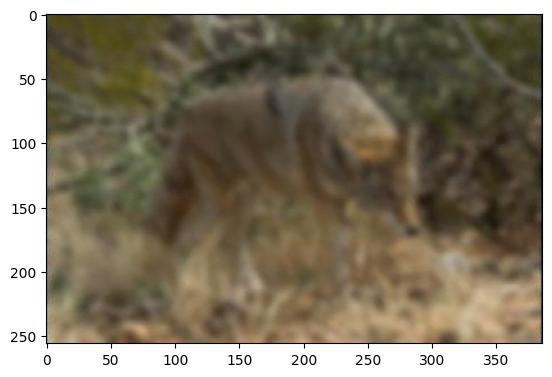

In [68]:
image = cv.imread('croped_image.jpg')
plt.imshow(image)

In [74]:
histSize = [256]
range_for_hist = [0, 256]

#функция получения гистограммы
def get_hist(image, histSize, range_for_hist,channel):
    histSize = [256]
    range = [0, 256]
    hist = cv.calcHist([image], [channel], None, histSize, range_for_hist)
    return(hist)   

#функия отображения гистограммы по трем цветовым каналам
def plot_rgb_hist(image, histSize, range):
    histSize = [256]
    range = [0, 256]
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv.calcHist([image], [i], None, histSize, range)
        plt.plot(hist, color=col, marker='o', linewidth=0)
        plt.xlim(range)

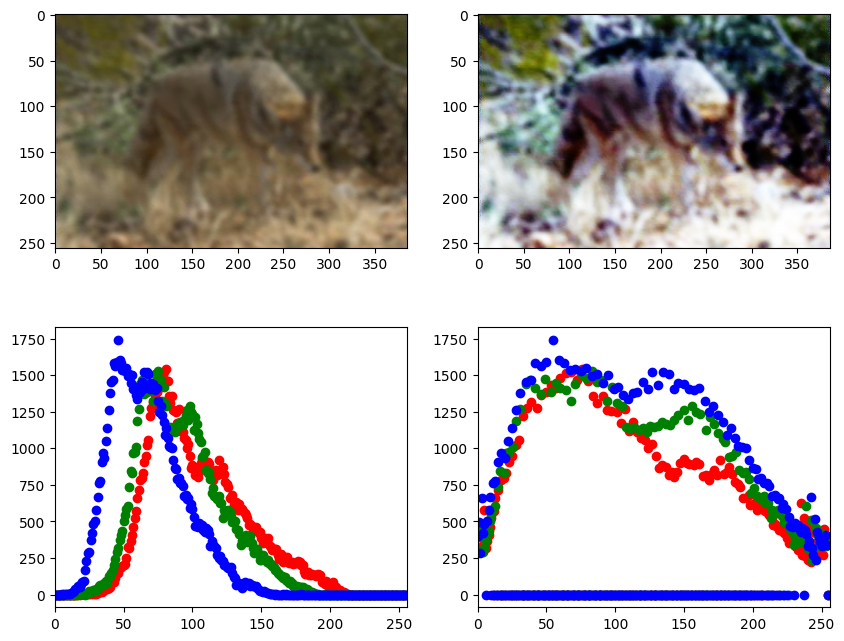

In [75]:
#Функция эквализации (реализованная)
def def_lut (i,hist_for_channel):
    array = i.reshape(-1)
    lut = np.empty(array.shape[0], np.uint8)
    i = 0
    divider = sum(hist_for_channel)
    for element in array:
        dividend=0
        for j in range(element):    
              dividend+=hist_for_channel[j]
        lut[i]=255 * (dividend /divider)
        i+=1
    return lut.reshape(256,386)     
    
result_image = np.empty(np.shape(image), np.uint8)   

hist_by_r_channel = get_hist(image[:,:,0],histSize,range_for_hist,0)
hist_by_g_channel = get_hist(image[:,:,1],histSize,range_for_hist,0)
hist_by_b_channel = get_hist(image[:,:,2],histSize,range_for_hist,0)
result_image[:,:,0] = def_lut(image[:,:,0],hist_by_r_channel)
result_image[:,:,1] = def_lut(image[:,:,1],hist_by_g_channel)
result_image[:,:,2] = def_lut(image[:,:,2],hist_by_b_channel)


gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(image)
plt.subplot(gs[1])
plt.imshow(result_image)
plt.subplot(gs[2])
plot_rgb_hist(image, histSize, range)
plt.subplot(gs[3])
plot_rgb_hist(result_image, histSize, range)
plt.show()

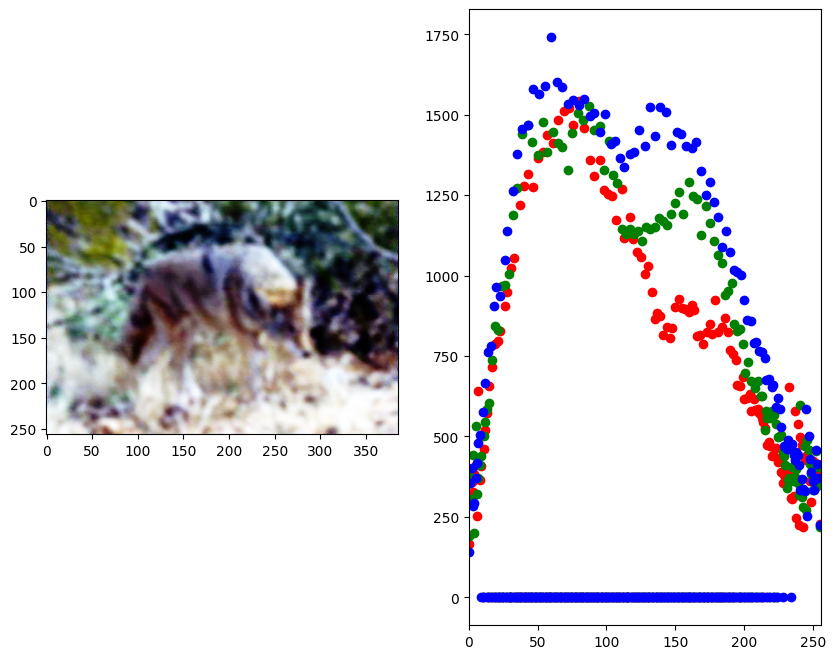

In [85]:
#Эквализация с помощью библиотеки

img = image

result_image = np.empty(np.shape(img), np.uint8)   
result_image[:,:,0] = cv2.equalizeHist(img[:,:,0])
result_image[:,:,1] = cv2.equalizeHist(img[:,:,1])
result_image[:,:,2] = cv2.equalizeHist(img[:,:,2])


gs = plt.GridSpec(1, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(result_image)
plt.subplot(gs[1])
plot_rgb_hist(result_image, histSize, range)